In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("default")
sns.set(style="whitegrid")

data_path = Path("..") / "data" / "raw" / "churn_synthetic.csv"
df = pd.read_csv(data_path)

df.head()




,tenure_months,monthly_charges,contract_type,payment_method,is_fiber,promo_active,support_tickets_90d,app_logins_30d,churn
0,7,57.48,two-year,paypal,1,1,1,25,0
1,55,55.84,month-to-month,paypal,1,0,3,15,0
2,47,80.38,month-to-month,paypal,1,1,2,14,0
3,32,81.38,month-to-month,debit,1,0,1,16,0
4,31,54.30,month-to-month,credit-card,0,0,2,21,0


In [12]:
df.info()
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tenure_months        5000 non-null   int64  
 1   monthly_charges      5000 non-null   float64
 2   contract_type        5000 non-null   object 
 3   payment_method       5000 non-null   object 
 4   is_fiber             5000 non-null   int64  
 5   promo_active         5000 non-null   int64  
 6   support_tickets_90d  5000 non-null   int64  
 7   app_logins_30d       5000 non-null   int64  
 8   churn                5000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 351.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tenure_months,5000.0,NaN,NaN,NaN,35.9074,20.551255,1.0,18.0,36.0,54.0,71.0
monthly_charges,5000.0,NaN,NaN,NaN,65.305254,19.954847,10.0,51.7375,64.955,78.74,134.08
contract_type,5000,3,month-to-month,2973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,5000,4,paypal,1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_fiber,5000.0,NaN,NaN,NaN,0.5542,0.497103,0.0,0.0,1.0,1.0,1.0
promo_active,5000.0,NaN,NaN,NaN,0.7002,0.458216,0.0,0.0,1.0,1.0,1.0
support_tickets_90d,5000.0,NaN,NaN,NaN,1.205,1.104907,0.0,0.0,1.0,2.0,6.0
app_logins_30d,5000.0,NaN,NaN,NaN,18.0296,4.271671,4.0,15.0,18.0,21.0,35.0
churn,5000.0,NaN,NaN,NaN,0.057,0.231866,0.0,0.0,0.0,0.0,1.0


In [13]:
churn_rate = df["churn"].mean()
churn_rate


0.057

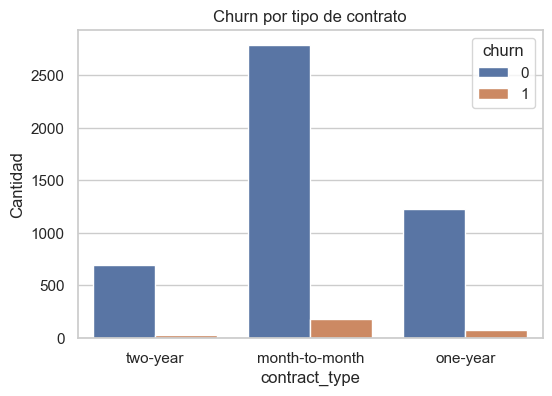

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="contract_type", hue="churn")
plt.title("Churn por tipo de contrato")
plt.ylabel("Cantidad")
plt.show()


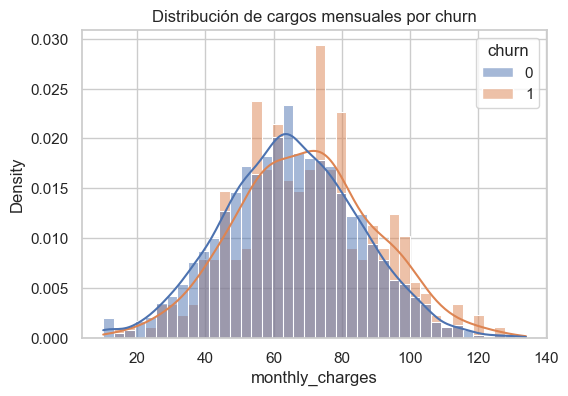

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="monthly_charges", hue="churn", kde=True, stat="density", common_norm=False)
plt.title("Distribución de cargos mensuales por churn")
plt.show()


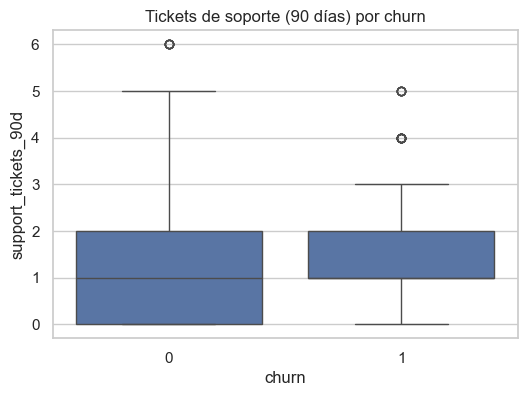

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="churn", y="support_tickets_90d")
plt.title("Tickets de soporte (90 días) por churn")
plt.show()


### Insights clave (ES)

- La tasa de churn se encuentra alrededor de **5.7%**.
- Clientes con contrato *month-to-month* muestran mayor churn.
- Cargos mensuales más altos y más tickets de soporte se asocian con mayor probabilidad de churn.
- Mayor uso de la app (logins) tiende a correlacionar con menor churn.

### Key insights (EN)

- Churn rate is around **5.7%**.
- *Month-to-month* contracts show the highest churn.
- Higher monthly charges and more support tickets are associated with higher churn.
- Higher app usage (logins) tends to correlate with lower churn.
